In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu

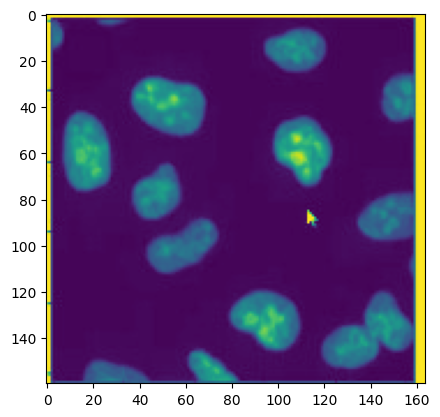

In [12]:
# Read an image
#image = io.imread("Allig (6).jpg")
image = io.imread('temp.jpg')
plt.imshow(image)

In [14]:
# from skimage.color import rgb2gray
# image_gray = rgb2gray(image)
# plt.imshow(image_gray, cmap='gray')

In [16]:
# import cv2
# gray_image =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_image, cmap='gray')

In [19]:
# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(image) # classes=7
#print(thresholds)

In [20]:
print(thresholds)

[ 54 173]


In [21]:
# Digitize (segment) original image into multiple classes.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(image, bins=thresholds)
print(regions)
output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 1 ... 2 2 2]
 ...
 [2 2 0 ... 2 2 2]
 [2 2 0 ... 2 2 2]
 [2 2 1 ... 2 2 2]]


/home/cfdml-04/miniconda3/envs/myenv/lib/python3.12/site-packages/skimage/util/dtype.py:576: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


In [22]:
print(output)

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 1 ... 2 2 2]
 ...
 [2 2 0 ... 2 2 2]
 [2 2 0 ... 2 2 2]
 [2 2 1 ... 2 2 2]]


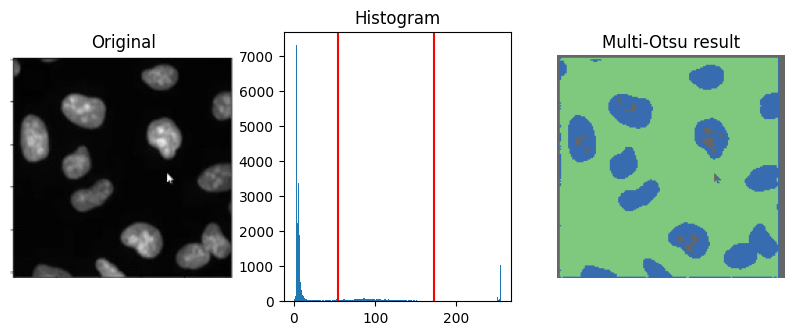

In [23]:
#Let us look at the input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [15]:
plt.imsave("Otsu_Segmented.jpg", regions, cmap='Accent')